In [1]:
import rpy2.robjects as robjects
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from common_tools import r_import_tool as r_in
from common_tools import plotting_tools as ploto
from common_tools import plotting_multivar as plotmulti


Load the RData file with raw data, models and modeldata, and convert to pandas format

In [2]:
robjects.r['load']('./data/data_r_in_num.RData')

d_in = r_in.import_rdata('d_in',0,'surveydata')
d_in_s = r_in.import_rdata('d_in_s',0,'surveydata_standardised')

In [ ]:
# Load models
robjects.r['load']('./data/modeldata_real_out.RData')

model_m1 = r_in.import_rdata('data_m1',1,'m1')
model_mwork = r_in.import_rdata('data_mwork',1,'mwork')
model_mteach = r_in.import_rdata('data_mteach',1,'mteach')
model_mequality_new = r_in.import_rdata('data_mequality_new',1,'mequality_new')
model_mreturn = r_in.import_rdata('data_mreturn',1,'mreturn')
model_mtot = r_in.import_rdata('data_mtot',1,'mtot_new')

# Load model data
robjects.r['load']('./data/model_real_out.RData')

data_m1 = r_in.import_rdata('data_m1',1,'m1')
data_mwork = r_in.import_rdata('data_mwork',1,'mwork')
data_mteach = r_in.import_rdata('data_mteach',1,'mteach')
data_mequality_new = r_in.import_rdata('data_mequality_new',1,'mequality_new')
data_mreturn = r_in.import_rdata('data_mreturn',1,'mreturn')
data_mtot = r_in.import_rdata('data_mtot',1,'mtot')

Make barplots and violinplots of the parameters

In [4]:
def plot_pretty_boxplot_multivar(dataframe, filename, xdown, xup, label, palette):
      
      import seaborn as sns
      import matplotlib.pyplot as plt

      # Initialize the figure
      f, ax = plt.subplots(figsize=(5, 4))

      # Add in points to show each observation
      # sns.stripplot(data=dataframe, x=data_name, y="model",
      #            size=0.5, color=".3", linewidth=0)
      
      # Plot the parameter values with horizontal boxes
      sns.boxplot(data=dataframe, orient="h", whis=[0, 100], width=.3, palette=palette,
        whiskerprops=dict(color="black"),
        boxprops=dict(edgecolor='black'),
        capprops=dict(color="black"),
        medianprops=dict(color="black"))
      
      ax.set_xlim(xdown, xup)
      
      plt.grid("True")
      #plt.subplots_adjust(bottom=3, top=4, left=2, right=3)
      plt.subplots_adjust(bottom=0.15, left=0.4)
      plt.xlabel(label)
      plt.savefig(filename + '.pdf', format='pdf')

NameError: name 'model_mreturn' is not defined

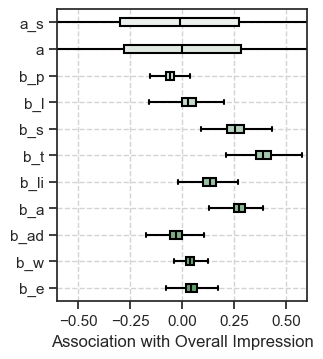

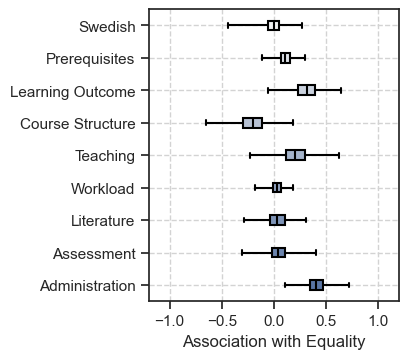

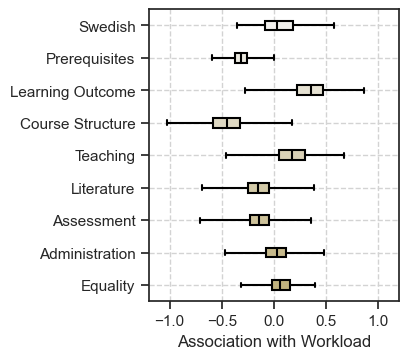

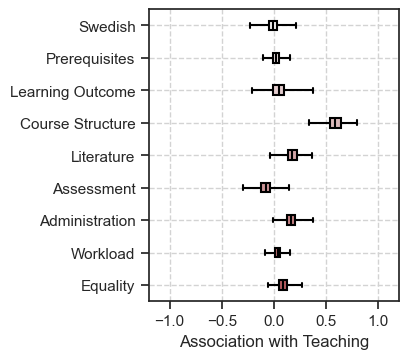

In [7]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)

model_m1_subset = model_m1.drop(columns=["sigma", "model"])
#model_m1_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_m1_subset, "m1", -0.6, 0.6, 'Association with Overall Impression', "light:g")

model_mequality_new_subset = model_mequality_new.drop(columns=["sigma", "model"])
model_mequality_new_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Workload", "Literature", "Assessment", "Administration"]
plot_pretty_boxplot_multivar(model_mequality_new_subset, "mequality_new", -1.2, 1.2, 'Association with Equality', "light:b")

model_mwork_subset = model_mwork.drop(columns=["sigma", "model"])
#model_mrq1b_subset = model_mrq1b_subset.iloc[:, :9]
model_mwork_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Equality"]
plot_pretty_boxplot_multivar(model_mwork_subset, "mwork", -1.2, 1.2, 'Association with Workload', "light:y")

model_mteach_subset = model_mteach.drop(columns=["sigma", "model"])
model_mteach_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_mteach_subset, "mteach", -1.2, 1.2, 'Association with Teaching', "light:r")

model_mreturn_subset = model_mreturn.drop(columns=["sigma", "model"])
#model_mteach_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Literature", "Assessment", "Administration", "Workload", "Equality"]
plot_pretty_boxplot_multivar(model_mreturn_subset, "mreturn", -1.2, 1.2, 'Association with Returned Surveys', "light:b")


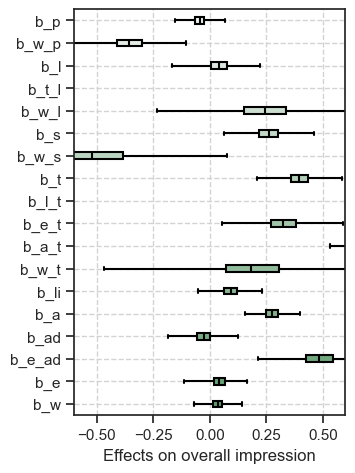

In [9]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)

model_mtot_sub = model_mtot.drop(columns=["a_0", "a_w", "a_l", "a_e", "a_a", "a_t", "sigma", "tau_w", "tau_l", "tau_e", "tau_a", "tau_t", "model"])
#model_m1_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Inequality"]
plot_pretty_boxplot_multivar(model_mtot_sub, "model_mtot", -0.6, 0.6, 'Effects on overall impression', "light:g")

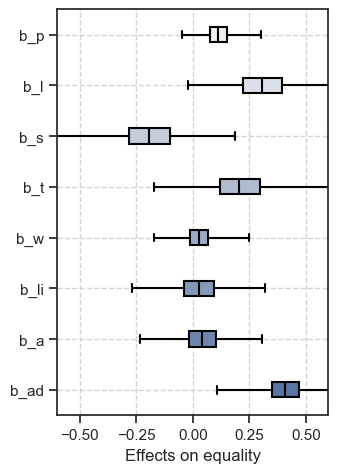

In [12]:
custom = {"grid.linestyle": "dashed", "grid.color": "lightgrey"}
sns.set_theme(style="ticks", rc = custom)

model_mequality_sub = model_mequality_new.drop(columns=["a_0", "sigma", "model"])
#model_m1_subset.columns = ["Swedish", "Prerequisites", "Learning Outcome", "Course Structure", "Teaching", "Literature", "Assessment", "Administration", "Workload", "Inequality"]
plot_pretty_boxplot_multivar(model_mequality_sub, "model_mequality", -0.6, 0.6, 'Effects on equality', "light:b")